# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.
<p>The following analysis will:</p>
<p>1. critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate</p>
<p>2. construct a statistically sound analysis and make recommendations</p>

### Resources
* Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
* More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html

### Tools and Skills
<p><b><em>Language:</em></b> Python</p>
<p><b><em>Skills:</em></b> API, JSON, EDA, Inferential Statistics, Machine Learning.</p>
<p><b><em>Libraries:</em></b> Pandas, NumPy, Requests, Matplotlib, Seaborn, Scikit-learn.</p>

***

## Set up Environment

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import the necessary modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_context('talk')
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [4]:
hospital_read_df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

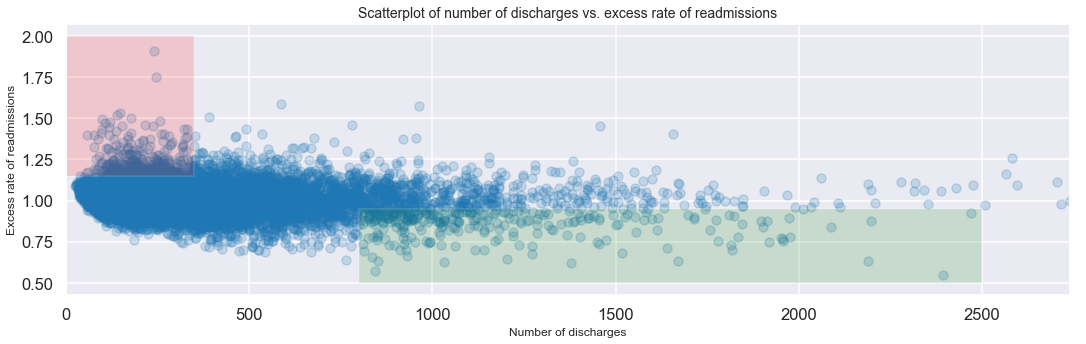

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
plt.rcParams['figure.figsize'] = [18,4]
#plt.style.use(['dark_background'])

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(18,5))
_=ax.scatter(x, y,alpha=0.2)

_=ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
_=ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

_=ax.set_xlim([0, max(x)])
_=ax.set_xlabel('Number of discharges', fontsize=12)
_=ax.set_ylabel('Excess rate of readmissions', fontsize=12)
_=ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

_=ax.grid(True)
#_=fig.tight_layout()

****
## Preliminary Report

<p>Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.</p>

#### A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

#### B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

#### C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

#### D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
## Exercise

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
****

### Do you agree with the above analysis and recommendations?
<p>One of the assertions is that capacity is correlated to discharge rate. However, the available data does not contain a capacity attribute and the conclusion is only assuming that discharges = capacity. Even, if capacity is linked to discharges, using only the available data and the scatter plot, we can’t conclude that the probability distribution of discharges is different for big vs. small facilities, as capacity can be defined in many ways that are not mutually exclusive. Capacity can be more than just as the size of the facility and may include the number of beds, specialized units, or even number of physicians. Therefore, the conclusion is vague and leaves room for speculation. In addition to this, there could be other factors that can impact discharges such as room scheduling, beds assignments, staff rotation or even day of admission (i.e. weekends vs. weekdays).</p>

### Setup an appropriate hypothesis test
<p>Based on the previous statement, we can define the hypothesis test as follows:</p>
<p>$H_0$:  The excess rate of readmissions for facilities with over 281 number of discharges <b>=</b> the rate of readmissions for facilities with low number of discharges ($\leq$ 281) </p>
<p>$H_A$:  The excess rate of readmissions for facilities with more than 281 number of discharges <b>$\neq$</b> than facilities with $\leq$ 281 number of discharges</p>
<p>$\alpha$ = 0.01</p> 

In [7]:
# remove missing values
clean_hospital_read_df = clean_hospital_read_df.dropna(how = 'any', subset = ['Excess Readmission Ratio','Number of Discharges'])

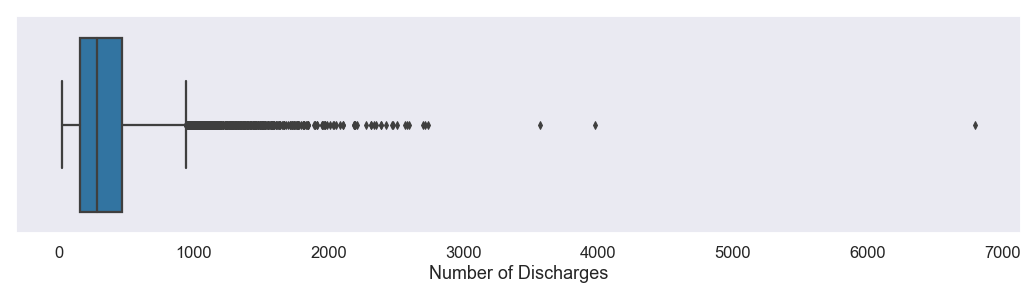

In [8]:
# Identify outliers
_=sns.boxplot(clean_hospital_read_df['Number of Discharges'])

In [9]:
# quantify outliers
clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 3000]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


<p>Since the boxplot shows that there are three extreme observations out of the 11497 records that have more than 3000 discharges, these observations were set aside and not used for the analysis as they are not a common occurrence and could significantly increase the sample variance and the sample mean, affecting the computation of the test statistics and p-value. This was done because we are particularly interested in finding the mean excess readmission rate.</p>

In [10]:
# remove observations that have over 3000 number of discharges
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 3000]

281.0

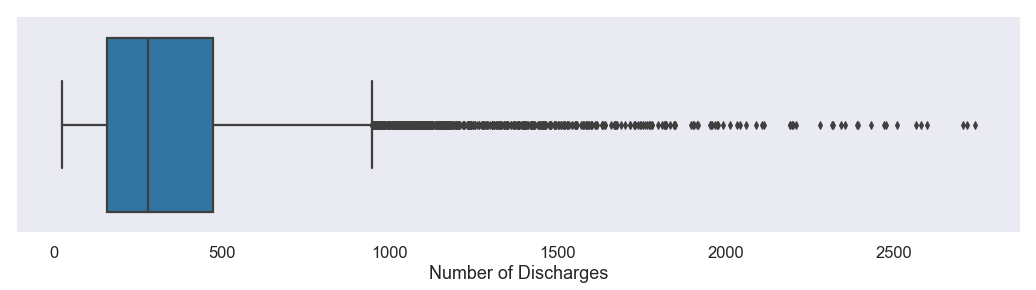

In [11]:
_=sns.boxplot(df['Number of Discharges'])
np.median(df['Number of Discharges'])

Since the median number of discharges is 281, the data was split to test the null hypothesis that there is no difference in the excess rate of readmissions between facilities with larger number of discharges or lower number of discharges.

In [12]:
len(df[df['Number of Discharges']<=281])
len(df[df['Number of Discharges']>281])

5748

5746

In [13]:
# subset and split dataset into high readmission ratio > 1
high_dr = df.loc[df['Number of Discharges']> 281,['Excess Readmission Ratio','Number of Discharges']]
#and low readmission ratio <=1
low_dr = df.loc[df['Number of Discharges']<= 281,['Excess Readmission Ratio','Number of Discharges']]

In [14]:
high_dr.describe()
low_dr.describe()

,Excess Readmission Ratio,Number of Discharges
count,5746.000000,5746.000000
mean,1.000574,566.766272
std,0.100331,305.479133
min,0.549500,282.000000
25%,0.939425,361.000000
50%,0.999000,474.000000
75%,1.061175,659.000000
max,1.583600,2740.000000


,Excess Readmission Ratio,Number of Discharges
count,5748.000000,5748.000000
mean,1.014505,161.931628
std,0.082062,64.883784
min,0.760200,25.000000
25%,0.961700,108.000000
50%,1.006850,159.500000
75%,1.056025,216.000000
max,1.909500,281.000000


Since there is not a big difference in the summary statistics in the Exess Readmission Ratio for facilities with more than or less than 281 number of discharges, we can calculate the ECDF to compare the probability distribution. 

### ECDF for Observed Excess Readmission Ratio 

In [15]:
# create a 1d array with number of discharges for high Excess Readmission Ratio set
high = high_dr['Excess Readmission Ratio'].values
# create a 1d array with number of discharges for low Excess Readmission Ratio set
low = low_dr['Excess Readmission Ratio'].values

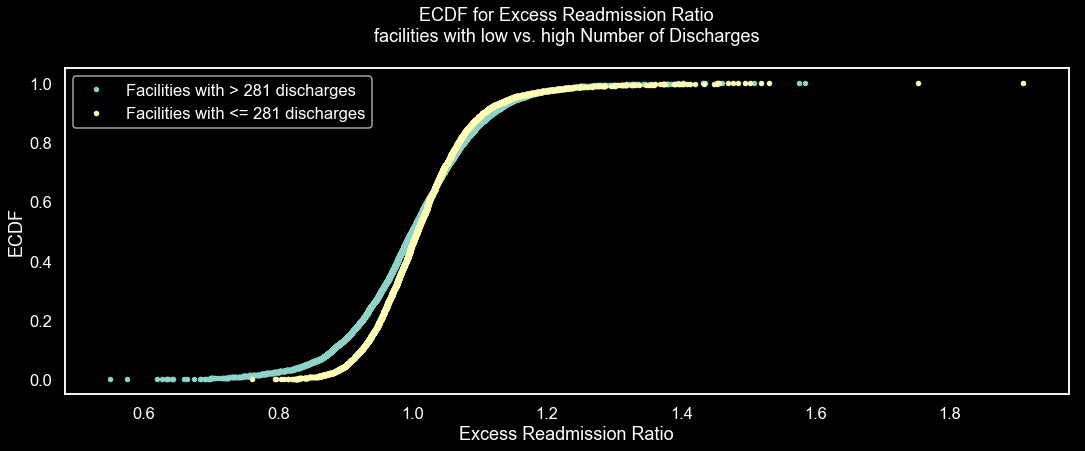

In [16]:
# look at the distribution of both arrays define function to compute the ECDF
def ecdf(data):
    """Return the cumulative distribution for one dimensional array"""
    # get number of data points
    n = len(data)
    # set x axis
    x = np.sort(data)
    # set y-axis
    y = np.arange(1, n+1)/n
    
    return x,y

x_h,y_h = ecdf(high)
x_l, y_l = ecdf(low)

# set the figure size and background
_=plt.style.use(['dark_background'])
_=plt.rcParams['figure.figsize'] = [18,6]

# plot number of discharges for high readmission ratio
_=plt.plot(x_h,y_h, marker = '.', linestyle = 'none')
# plot number of discharges for low readmission ratio
_=plt.plot(x_l,y_l, marker = '.', linestyle = 'none')
# set labels and titles
_=plt.title('ECDF for Excess Readmission Ratio\nfacilities with low vs. high Number of Discharges\n')
_=plt.legend(['Facilities with > 281 discharges', 'Facilities with <= 281 discharges'])
_=plt.xlabel('Excess Readmission Ratio')
_=plt.ylabel('ECDF')

The probability distribution for number of discharges for lower and higher rates of readmissions shows that facilities with more than 281 discharges have slightly lower excess readmission ration as show by the green data points below 0.8.

****
### Compute P-Value and Statistical Significance for 𝛼 = 0.01

In [17]:
# create a function to obtain the difference of means
def diff_mean(array1, array2):
    """Return the difference in means of two 1D arrays"""
    return np.mean(array1) - np.mean(array2)

# Create a bootstrap replica to simulate data under the null hypothesis
def permutation_samples(array1, array2):
    """Return a permutation sample from two arrays"""
    #combine the two arrays
    combined = np.concatenate((array1, array2))
    
    # randomize the data and ignore labels
    perm_sp = np.random.permutation(combined)
    
    # randomly separate the data
    perm1 = perm_sp[:len(array1)]
    perm2 = perm_sp[len(array1):]
    
    return perm1, perm2

# define the permutation replicates of means
def permutation_replicates(array1, array2, function, size):
    """Return array of sample statistics computer from a permutation sample"""
    
    # create an empty array to hold the means
    perm_array = np.empty(size)
    
    # create the permutation sample using function
    for i in range(size):
        ps1, ps2 = permutation_samples(array1, array2)
        
    # compute the replicates on n size of permutation samples
        perm_array[i] = function(ps1,ps2)
        
    return perm_array

# set the random seed
np.random.seed(44)

# find the men observed diffence 
diff_ratio = diff_mean(low, high)

perm_reps = permutation_replicates(low, high, diff_mean, 10000)

p_value = np.sum(perm_reps>=diff_ratio)/len(perm_reps)

t_test =stats.ttest_ind(low, high)

print('********')
print('Observed difference in Excess Readmission Ratio:',np.round((diff_ratio),4))
print('t critical value at 0.01: 2.576')
print('t_test:', np.round((t_test[0]),4))
print('p-value:',p_value)

********
Observed difference in Excess Readmission Ratio: 0.0139
t critical value at 0.01: 2.576
t_test: 8.1479
p-value: 0.0


array([-0.00330464,  0.00340046])

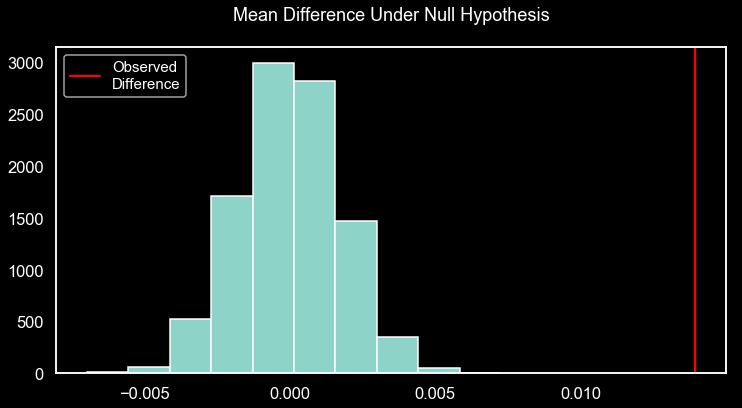

In [18]:
_=plt.style.use(['dark_background'])
_=plt.rcParams['figure.figsize'] = [12,6]
_=plt.title('Mean Difference Under Null Hypothesis\n')
_=plt.axvline(diff_ratio, color = 'red', label = 'Observed Difference')
_=plt.legend(['Observed\nDifference'], fontsize = 15)
_=plt.hist(perm_reps)
np.percentile(perm_reps,[2.5, 97.5])

<p><em>The above histogram shows that after 10,000 simulations, none of the replicates reached a mean difference as high as the observed one.</em></p>
<p>After simulating the readmission results 10,000 times under the null hypothesis, the difference in the mean excess readmission ratio between facilities with more than 281 was 0.3%. Since none of the simulations reached a mean difference that was at least as high as the one observed of 1.39% and we obtained a p-value of 0.0 and a t-statistic of 8.1479, we can conclude that with everything else being equal, the mean difference between facilities with more than 281 discharges and less than 280 is statistically significant at the 0.01 significance level. Hence, we reject the null hypothesis.</p>

### Statistical Significance and Practical Significance. 
<p><em> Do they differ here? How does this change your recommendation to the client?</em></p>
<p>Although the difference is statistically significant (>1.0%), the assessment of whether is practically significant will depend on the operational and financial strains imposed to facilities, as they will have to care for more patients while keeping readmissions rate low. This could involve higher staff rotation, narrower scheduling of specialized units, tighter room scheduling, and perhaps less non life-threatening admissions. Thus, operational and financial requirements to keep readmissions low need to be considered as they may or may not offset the financial penalties.</p>

#### What are the advantages and disadvantages of using this plot to convey information?
<p>One of the advantages of using the above scatter plot is that it we can see there is a correlation between attributes. However, since all the dots have the same size and color, it is hard to easily differential readmissions over 1 or facilities with larger numbers of discharges.</p>
<p>In contrast, in the scatterplot below we can easily see how facilities with over 281 number of discharges tend to have a lower readmission rate. By using a different scale for the discharge values in x-axis,  we can better distinguish the facilities with low discharges, since the presence of large numbers tend to compress small values. Also, by using a two-color palette we can differentiate facilities with Readmission rations greater than 1.</p>

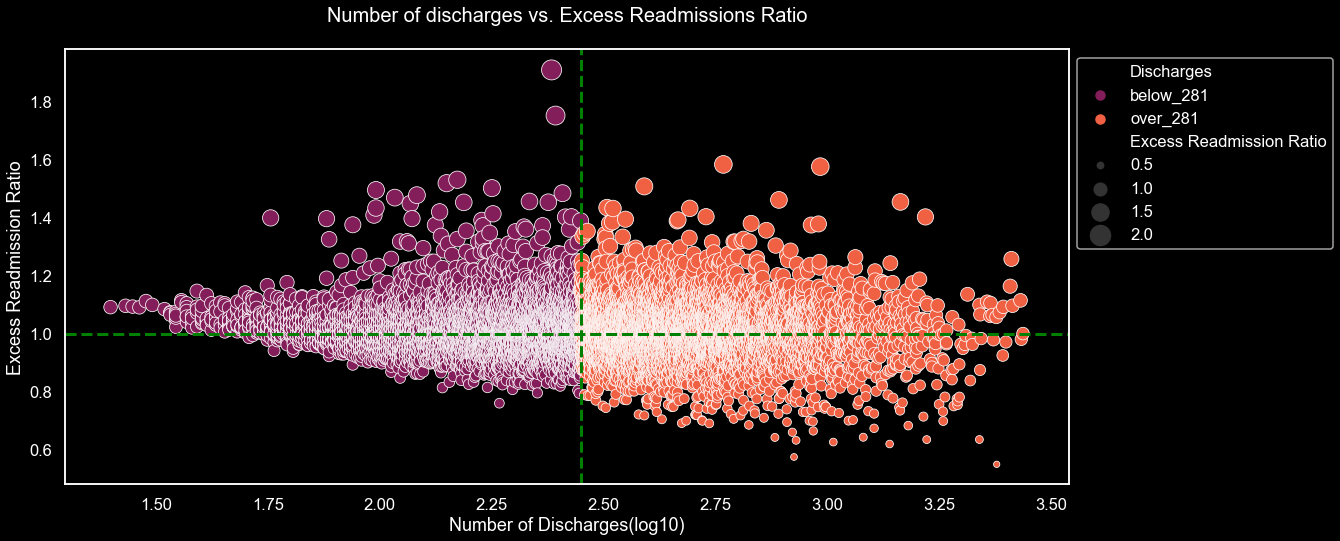

In [19]:
_=plt.style.use(['dark_background'])
_=plt.rcParams['figure.figsize'] = [18,8]
_=df['Discharges'] = ['over_281' if x > 281 else 'below_281' for x in df['Number of Discharges']]
_=sns.scatterplot(x=np.log10(df["Number of Discharges"]), y="Excess Readmission Ratio",
                     hue="Discharges",size="Excess Readmission Ratio",
                     palette='rocket',sizes=(40, 400),ci = 95,legend = 'brief', data=df)

_=plt.xlabel('Number of Discharges(log10)')
_=plt.title('Number of discharges vs. Excess Readmissions Ratio\n', size = 20)
_=plt.axhline(1.0, color = 'green', linestyle="--", linewidth=3)
_=plt.axvline(2.449, color = 'green', linestyle="--", linewidth=3)
_=plt.legend(bbox_to_anchor=(1, 1), loc=2)